# EMTAB7895 - preprocessing
## Xiaonan Wang
## 01Jun2022

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.7.1 anndata==0.7.8 umap==0.5.1 numpy==1.19.5 scipy==1.5.4 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6


# Data in

In [2]:
FileDir = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895'

In [3]:
meta = pd.read_csv('E-MTAB-7895.sdrf.txt', index_col=0, sep='\t')

In [24]:
meta

,Comment[ENA_SAMPLE],Comment[BioSD_SAMPLE],Characteristics[organism],Characteristics[strain],Characteristics[sex],Characteristics[age],Unit[time unit],Characteristics[developmental stage],Characteristics[genotype],Characteristics[organism part],...,Comment[read1 file],Comment[FASTQ_URI],Comment[read2 file],Comment[FASTQ_URI].1,Comment[index1 file],Comment[FASTQ_URI].2,Factor Value[genotype],Factor Value[injury],Factor Value[time],Unit[time unit].1
Source Name,,,,,,,,,,,,,,,,,,,,,
MF17004,ERS3379096,SAMEA5574858,Mus musculus,C57BL/6J,male,10,week,adult,wild type genotype,cardiac ventricle,...,MF17004_GT17-10999_S10_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17004_GT17-10999_S10_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17004_GT17-10999_S10_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,wild type genotype,sham,7,day
MF17004,ERS3379096,SAMEA5574858,Mus musculus,C57BL/6J,male,10,week,adult,wild type genotype,cardiac ventricle,...,MF17004_GT17-13609_S3_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17004_GT17-13609_S3_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17004_GT17-13609_S3_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,wild type genotype,sham,7,day
MF17004,ERS3379096,SAMEA5574858,Mus musculus,C57BL/6J,male,10,week,adult,wild type genotype,cardiac ventricle,...,MF17004_GT17-13609_S3_L002_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17004_GT17-13609_S3_L002_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17004_GT17-13609_S3_L002_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,wild type genotype,sham,7,day
MF17008,ERS3379097,SAMEA5574859,Mus musculus,C57BL/6J,male,10,week,adult,wild type genotype,cardiac ventricle,...,MF17008_GT17-11003_S14_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17008_GT17-11003_S14_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17008_GT17-11003_S14_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,wild type genotype,sham,7,day
MF17008,ERS3379097,SAMEA5574859,Mus musculus,C57BL/6J,male,10,week,adult,wild type genotype,cardiac ventricle,...,MF17008_GT17-13613_S7_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17008_GT17-13613_S7_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17008_GT17-13613_S7_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,wild type genotype,sham,7,day
MF17008,ERS3379097,SAMEA5574859,Mus musculus,C57BL/6J,male,10,week,adult,wild type genotype,cardiac ventricle,...,MF17008_GT17-13613_S7_L002_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17008_GT17-13613_S7_L002_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17008_GT17-13613_S7_L002_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,wild type genotype,sham,7,day
MF17010,ERS3379090,SAMEA5574852,Mus musculus,C57BL/6J,male,10,week,adult,Wt1Cre;RosaZsgreenf/+,cardiac ventricle,...,MF17010_GT17-12037_S7_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17010_GT17-12037_S7_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17010_GT17-12037_S7_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Wt1Cre;RosaZsgreenf/+,none,0,day
MF17010,ERS3379090,SAMEA5574852,Mus musculus,C57BL/6J,male,10,week,adult,Wt1Cre;RosaZsgreenf/+,cardiac ventricle,...,MF17010_GT17-12037_S7_L002_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17010_GT17-12037_S7_L002_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17010_GT17-12037_S7_L002_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Wt1Cre;RosaZsgreenf/+,none,0,day
MF17010,ERS3379090,SAMEA5574852,Mus musculus,C57BL/6J,male,10,week,adult,Wt1Cre;RosaZsgreenf/+,cardiac ventricle,

In [4]:
# remove duplicates due to paired end sequencing R1,R2
meta = meta.drop_duplicates(subset=['Comment[ENA_SAMPLE]'])

In [8]:
meta

,Comment[ENA_SAMPLE],Comment[BioSD_SAMPLE],Characteristics[organism],Characteristics[strain],Characteristics[sex],Characteristics[age],Unit[time unit],Characteristics[developmental stage],Characteristics[genotype],Characteristics[organism part],...,Comment[read1 file],Comment[FASTQ_URI],Comment[read2 file],Comment[FASTQ_URI].1,Comment[index1 file],Comment[FASTQ_URI].2,Factor Value[genotype],Factor Value[injury],Factor Value[time],Unit[time unit].1
Source Name,,,,,,,,,,,,,,,,,,,,,
MF17004,ERS3379096,SAMEA5574858,Mus musculus,C57BL/6J,male,10,week,adult,wild type genotype,cardiac ventricle,...,MF17004_GT17-10999_S10_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17004_GT17-10999_S10_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17004_GT17-10999_S10_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,wild type genotype,sham,7,day
MF17008,ERS3379097,SAMEA5574859,Mus musculus,C57BL/6J,male,10,week,adult,wild type genotype,cardiac ventricle,...,MF17008_GT17-11003_S14_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17008_GT17-11003_S14_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17008_GT17-11003_S14_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,wild type genotype,sham,7,day
MF17010,ERS3379090,SAMEA5574852,Mus musculus,C57BL/6J,male,10,week,adult,Wt1Cre;RosaZsgreenf/+,cardiac ventricle,...,MF17010_GT17-12037_S7_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17010_GT17-12037_S7_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17010_GT17-12037_S7_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Wt1Cre;RosaZsgreenf/+,none,0,day
MF17013,ERS3379091,SAMEA5574853,Mus musculus,C57BL/6J,male,10,week,adult,Wt1Cre;RosaZsgreenf/+,cardiac ventricle,...,MF17013_GT17-12040_S10_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17013_GT17-12040_S10_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17013_GT17-12040_S10_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Wt1Cre;RosaZsgreenf/+,myocardial infarction,1,day
MF17014,ERS3379092,SAMEA5574854,Mus musculus,C57BL/6J,male,10,week,adult,Wt1Cre;RosaZsgreenf/+,cardiac ventricle,...,MF17014_GT17-12041_S11_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17014_GT17-12041_S11_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17014_GT17-12041_S11_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Wt1Cre;RosaZsgreenf/+,myocardial infarction,3,day
MF17015,ERS3379094,SAMEA5574856,Mus musculus,C57BL/6J,male,10,week,adult,Wt1Cre;RosaZsgreenf/+,cardiac ventricle,...,MF17015_GT17-12042_S12_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17015_GT17-12042_S12_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17015_GT17-12042_S12_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Wt1Cre;RosaZsgreenf/+,myocardial infarction,5,day
MF17016,ERS3379095,SAMEA5574857,Mus musculus,C57BL/6J,male,10,week,adult,Wt1Cre;RosaZsgreenf/+,cardiac ventricle,...,MF17016_GT17-12043_S13_L001_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17016_GT17-12043_S13_L001_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17016_GT17-12043_S13_L001_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Wt1Cre;RosaZsgreenf/+,myocardial infarction,7,day
MF17017,ERS3379099,SAMEA5574861,Mus musculus,C57BL/6J,male,10,week,adult,Wt1Cre;RosaZsgreenf/+,cardiac ventricle,...,MF17017_GT17-15642_S4_L004_R1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17017_GT17-15642_S4_L004_R2_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,MF17017_GT17-15642_S4_L004_I1_001.fastq.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,Wt1Cre;RosaZsgreenf/+,myocardial infarctio

In [5]:
meta1 = meta[['Characteristics[organism]', 'Characteristics[strain]', 'Characteristics[age]', 'Characteristics[developmental stage]', 'Characteristics[sex]','Characteristics[genotype]','Factor Value[genotype]', 'Comment[read1 file]','Factor Value[injury]', 'Factor Value[time]','Comment[ENA_RUN]','Characteristics[organism part]']]

In [6]:
meta1.columns = ['Organism', 'Strain', 'Age', 'Development_stage', 'Gender', 'Genotype', 'CellType', 'Filename','Condition','Day','ERR','Tissue']

In [12]:
meta1

,Organism,Strain,Age,Development_stage,Gender,Genotype,CellType,Filename,Condition,Day,ERR,Tissue
Source Name,,,,,,,,,,,,
MF17004,Mus musculus,C57BL/6J,10,adult,male,wild type genotype,wild type genotype,MF17004_GT17-10999_S10_L001_R1_001.fastq.gz,sham,7,ERR3289184,cardiac ventricle
MF17008,Mus musculus,C57BL/6J,10,adult,male,wild type genotype,wild type genotype,MF17008_GT17-11003_S14_L001_R1_001.fastq.gz,sham,7,ERR3289187,cardiac ventricle
MF17010,Mus musculus,C57BL/6J,10,adult,male,Wt1Cre;RosaZsgreenf/+,Wt1Cre;RosaZsgreenf/+,MF17010_GT17-12037_S7_L001_R1_001.fastq.gz,none,0,ERR3289167,cardiac ventricle
MF17013,Mus musculus,C57BL/6J,10,adult,male,Wt1Cre;RosaZsgreenf/+,Wt1Cre;RosaZsgreenf/+,MF17013_GT17-12040_S10_L001_R1_001.fastq.gz,myocardial infarction,1,ERR3289170,cardiac ventricle
MF17014,Mus musculus,C57BL/6J,10,adult,male,Wt1Cre;RosaZsgreenf/+,Wt1Cre;RosaZsgreenf/+,MF17014_GT17-12041_S11_L001_R1_001.fastq.gz,myocardial infarction,3,ERR3289173,cardiac ventricle
MF17015,Mus musculus,C57BL/6J,10,adult,male,Wt1Cre;RosaZsgreenf/+,Wt1Cre;RosaZsgreenf/+,MF17015_GT17-12042_S12_L001_R1_001.fastq.gz,myocardial infarction,5,ERR3289178,cardiac ventricle
MF17016,Mus musculus,C57BL/6J,10,adult,male,Wt1Cre;RosaZsgreenf/+,Wt1Cre;RosaZsgreenf/+,MF17016_GT17-12043_S13_L001_R1_001.fastq.gz,myocardial infarction,7,ERR3289181,cardiac ventricle
MF17017,Mus musculus,C57BL/6J,10,adult,male,Wt1Cre;RosaZsgreenf/+,Wt1Cre;RosaZsgreenf/+,MF17017_GT17-15642_S4_L004_R1_001.fastq.gz,myocardial infarction,14,ERR3289192,cardiac ventricle
MF17018,Mus musculus,C57BL/6J,10,adult,male,Wt1Cre;RosaZsgreenf/+,Wt1Cre;RosaZsgreenf/+,MF17018_GT17-15643_S5_L005_R1_001.fastq.gz,myocardial infarction,28,ERR3289193,cardiac ventricle


In [7]:
meta1 = meta1.assign(StudyID = 'EMTAB7895')
meta1 = meta1.assign(Index=[x[:7] for x in meta1['Filename']])
meta1.drop('Filename', axis=1, inplace=True)

In [19]:
meta1.head(2)

,Organism,Strain,Age,Development_stage,Gender,Genotype,CellType,Condition,Day,ERR,Tissue,StudyID,Index
Source Name,,,,,,,,,,,,,
MF17004,Mus musculus,C57BL/6J,10,adult,male,wild type genotype,wild type genotype,sham,7,ERR3289184,cardiac ventricle,EMTAB7895,MF17004
MF17008,Mus musculus,C57BL/6J,10,adult,male,wild type genotype,wild type genotype,sham,7,ERR3289187,cardiac ventricle,EMTAB7895,MF17008


In [32]:
adata = []
for idx, row in meta1.iterrows():
    adata_sub = sc.read_10x_h5(FileDir+'/processed_data/'+row['Index']+'_out/outs/filtered_feature_bc_matrix.h5')
    adata_sub.obs['Organism'] = row['Organism']
    adata_sub.obs['Strain'] = row['Strain']
    adata_sub.obs['Age'] = row['Age']
    adata_sub.obs['Development_stage'] = row['Development_stage']
    adata_sub.obs['Gender'] = row['Gender']
    adata_sub.obs['Genotype'] = row['Genotype']
    adata_sub.obs['CellType'] = row['CellType']
    adata_sub.obs['Condition'] = row['Condition']
    adata_sub.obs['Day'] = row['Day']
    adata_sub.obs['ERR'] = row['ERR']
    adata_sub.obs['Tissue'] = row['Tissue']
    adata_sub.obs['StudyID'] = row['StudyID']
    adata_sub.obs['Index'] = row['Index']
    adata_sub.var_names_make_unique()
    adata.append(adata_sub)
    del adata_sub

reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895/processed_data/MF17004_out/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895/processed_data/MF17008_out/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895/processed_data/MF17010_out/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895/processed_data/MF17013_out/outs/fil

# Doublet removal

In [33]:
import scrublet as scr

In [34]:
scrub_obj = []
for i in range(len(adata)):
    scrub = scr.Scrublet(adata[i].X.toarray())
    doublet_scores, predicted_doublets = scrub.scrub_doublets()
    adata[i].obs['db_scores'] = doublet_scores
    adata[i].obs['predicted_db'] = predicted_doublets
    scrub_obj.append(scrub)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 20.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.4%
Elapsed time: 2.6 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 21.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.4%
Elapsed time: 3.2 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.37
Detected doublet rate = 2.7%
Estimated detectable doublet fraction = 34.4%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.0%
Elapsed time: 7.3 seconds
Preprocessing...
Simulating double

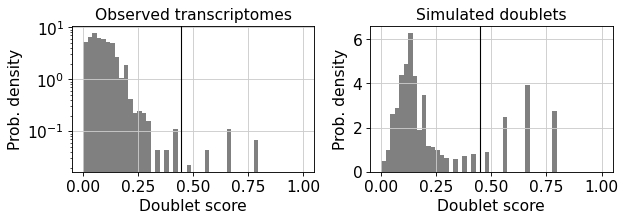

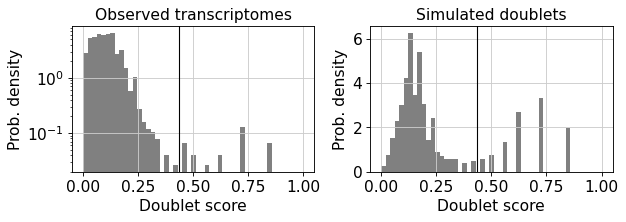

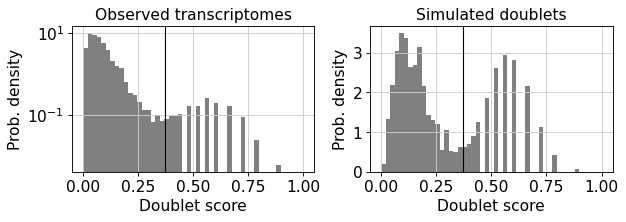

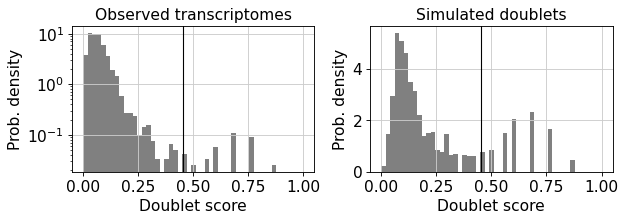

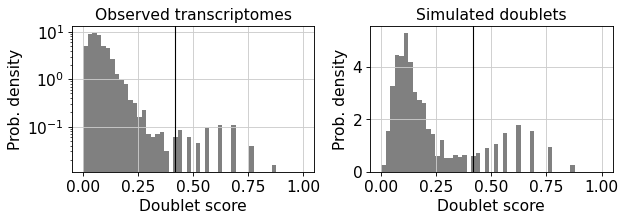

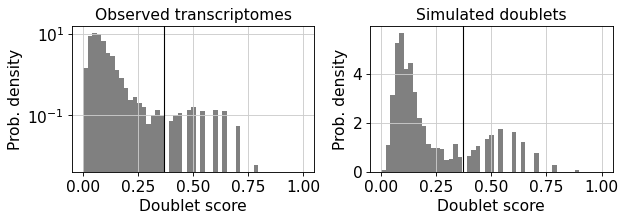

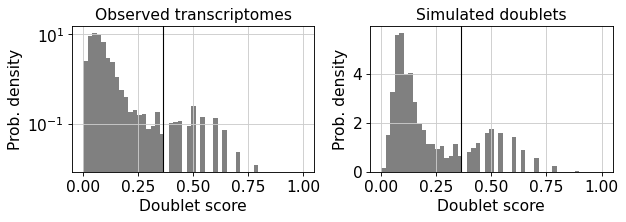

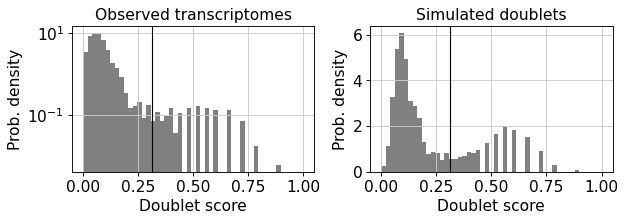

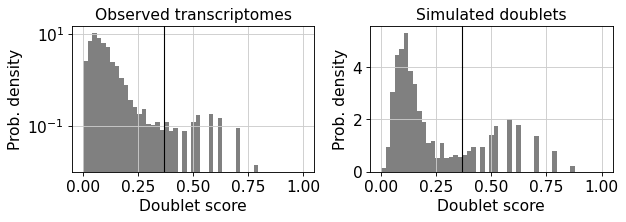

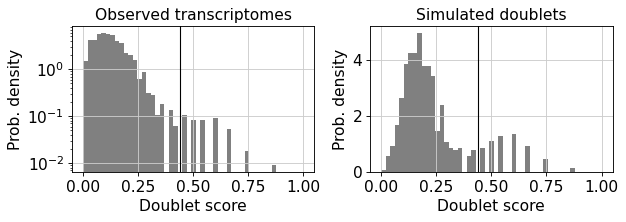

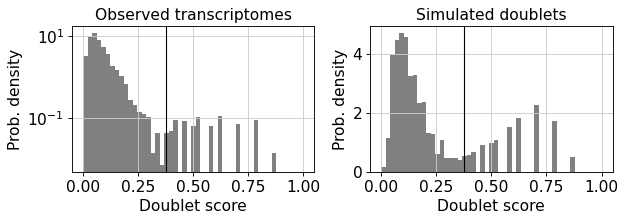

In [35]:
for i in range(len(adata)):
    scrub_obj[i].plot_histogram()

In [36]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

48
['sham: Number of doublets = 11']
47
['sham: Number of doublets = 28']
336
['none: Number of doublets = 228']
125
['myocardial infarction: Number of doublets = 46']
170
['myocardial infarction: Number of doublets = 72']
280
['myocardial infarction: Number of doublets = 170']
284
['myocardial infarction: Number of doublets = 186']
311
['myocardial infarction: Number of doublets = 249']
279
['myocardial infarction: Number of doublets = 158']
91
['sham: Number of doublets = 49']
174
['myocardial infarction: Number of doublets = 106']


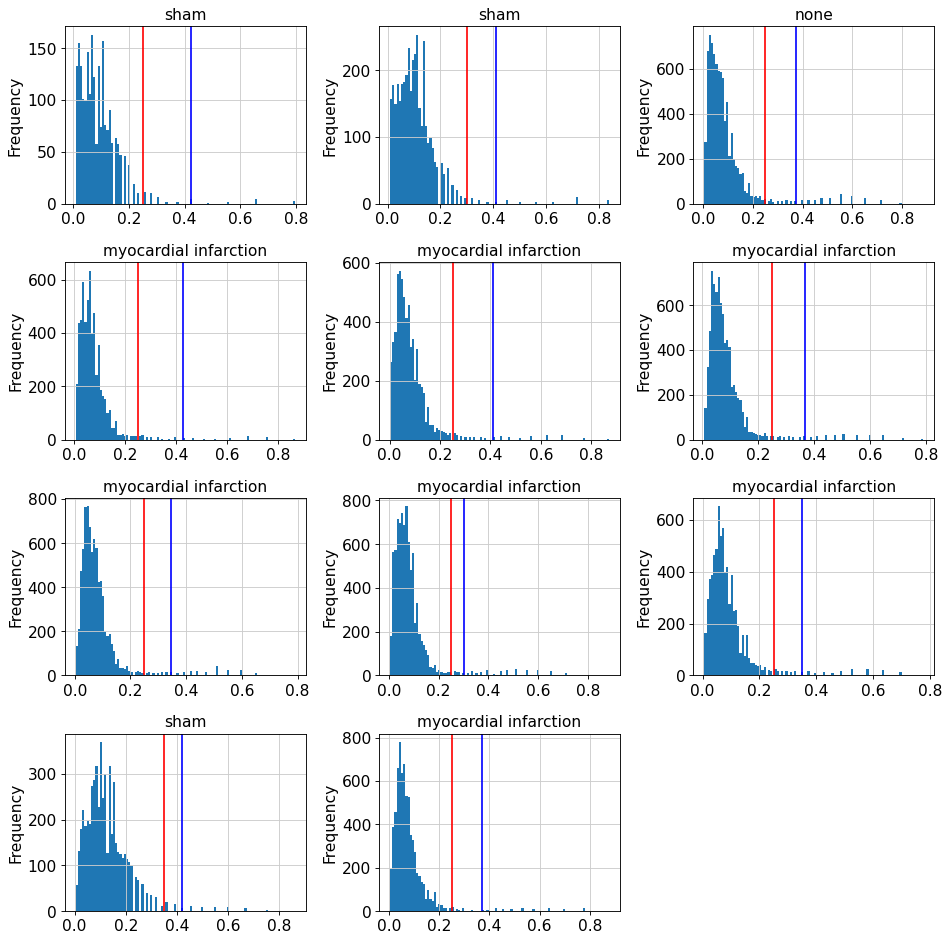

In [42]:
cutoffs = [0.25, 0.3, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.35, 0.25]

fig, ax = plt.subplots(4,3, figsize=(12,12))
ax = ax.flatten()
ax = trim_axs(ax, len(adata))
for i in range(len(adata)):    
    pd.DataFrame(adata[i].obs['db_scores']).plot.hist(bins=100, ax=ax[i])
    ax[i].axvline(x=cutoffs[i], color='r')
    ax[i].axvline(x=np.sort(adata[i].obs['db_scores'])[::-1][np.sum(adata[i].obs['predicted_db'])], color='b')
    ax[i].get_legend().remove()
    ax[i].set_title(adata[i].obs['Condition'][0])
    print(np.sum(adata[i].obs['db_scores'] > cutoffs[i]))
    print(np.unique(adata[i].obs['Condition'])+': Number of doublets = '+str(np.sum(adata[i].obs['predicted_db'])))
plt.tight_layout()  

In [43]:
for i in range(len(adata)):
    adata[i].obs['predicted_db'] = adata[i].obs['db_scores'] > cutoffs[i]

In [44]:
# remove doublets
for i in range(len(adata)):
    print(np.unique(adata[i].obs['Condition'])+str(adata[i].shape))
    adata[i] = adata[i][~adata[i].obs['predicted_db'],:].copy()
    print(np.unique(adata[i].obs['Condition'])+str(adata[i].shape))

['sham(2204, 32285)']
['sham(2156, 32285)']
['sham(3752, 32285)']
['sham(3705, 32285)']
['none(8316, 32285)']
['none(7980, 32285)']
['myocardial infarction(5877, 32285)']
['myocardial infarction(5752, 32285)']
['myocardial infarction(6345, 32285)']
['myocardial infarction(6175, 32285)']
['myocardial infarction(8119, 32285)']
['myocardial infarction(7839, 32285)']
['myocardial infarction(8040, 32285)']
['myocardial infarction(7756, 32285)']
['myocardial infarction(8392, 32285)']
['myocardial infarction(8081, 32285)']
['myocardial infarction(7215, 32285)']
['myocardial infarction(6936, 32285)']
['sham(5448, 32285)']
['sham(5357, 32285)']
['myocardial infarction(7048, 32285)']
['myocardial infarction(6874, 32285)']


# QC

In [45]:
[x for x in adata[0].var_names if 'mt-' in x]

['mt-Nd1',
 'mt-Nd2',
 'mt-Co1',
 'mt-Co2',
 'mt-Atp8',
 'mt-Atp6',
 'mt-Co3',
 'mt-Nd3',
 'mt-Nd4l',
 'mt-Nd4',
 'mt-Nd5',
 'mt-Nd6',
 'mt-Cytb']

In [46]:
for i in range(len(adata)):
    adata[i].var['mt'] = adata[i].var_names.str.startswith('mt-') 
    sc.pp.calculate_qc_metrics(adata[i], qc_vars=['mt'], inplace=True)

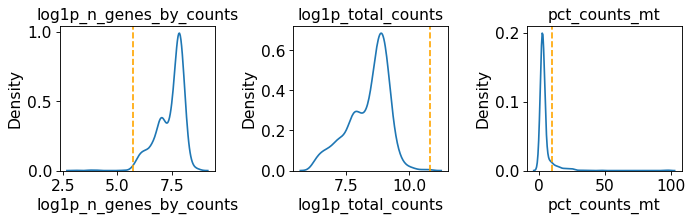

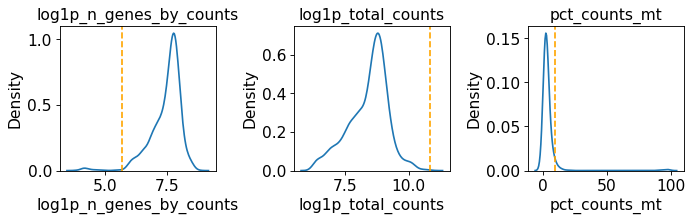

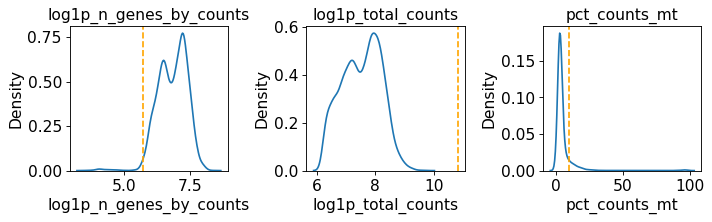

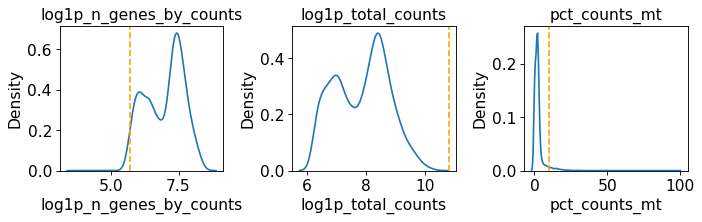

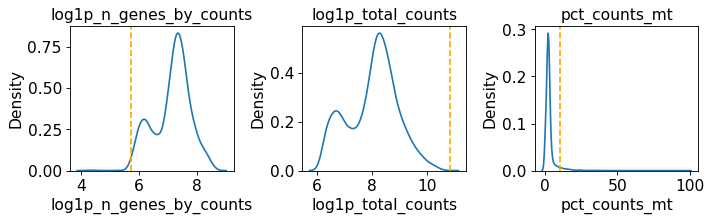

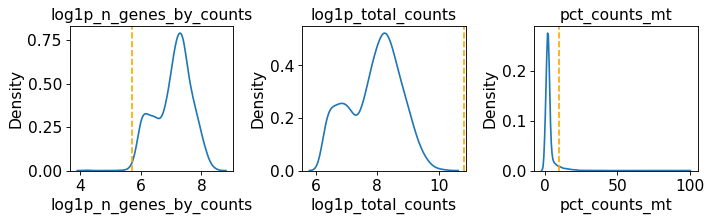

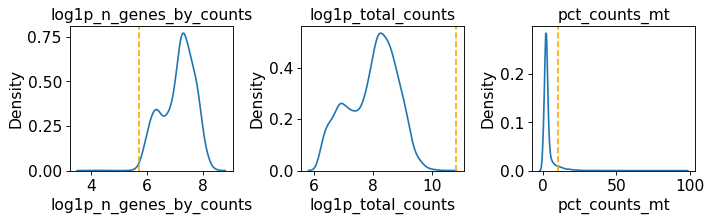

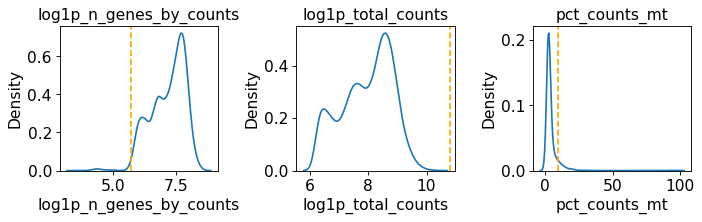

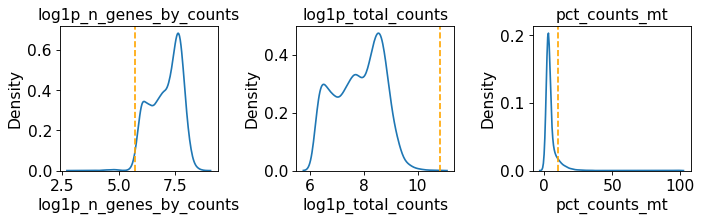

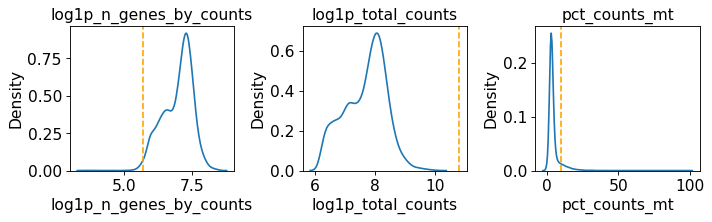

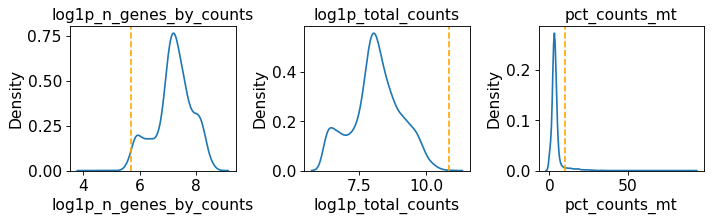

In [48]:
cutoffs = [[300,50000, np.exp(10)],
           [300,50000, np.exp(10)],
           [300,50000, np.exp(10)],
           [300,50000, np.exp(10)],
           [300,50000, np.exp(10)],
           [300,50000, np.exp(10)],
           [300,50000, np.exp(10)],
           [300,50000, np.exp(10)],
           [300,50000, np.exp(10)],
           [300,50000, np.exp(10)],
           [300,50000, np.exp(10)]
          ]
for i in range(len(adata)):
    obs_terms = ['log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_mt']
    fig,ax = plt.subplots(1,3, figsize=(9,3))
    for j in range(len(obs_terms)):
        sns.kdeplot(adata[i].obs[obs_terms[j]], ax=ax[j])
        ax[j].grid(False)
        ax[j].set_title(obs_terms[j])
        ax[j].axvline(np.log1p(cutoffs[i][j]), c='orange', linestyle='--')
    plt.tight_layout()

In [49]:
for i in range(len(adata)):
    sc.pp.filter_cells(adata[i], min_genes=cutoffs[i][0])
    #sc.pp.filter_genes(adata[i], min_cells=1)
    adata[i] = adata[i][(adata[i].obs['total_counts'] <= cutoffs[i][1]) & (adata[i].obs['pct_counts_mt'] <= np.log(cutoffs[i][2])), :].copy()
    print(adata[i].obs['Condition'].value_counts().sort_index())

filtered out 11 cells that have less than 300 genes expressed
filtered out 46 cells that have less than 300 genes expressed


sham    1974
Name: Condition, dtype: int64
sham    3555
Name: Condition, dtype: int64


filtered out 94 cells that have less than 300 genes expressed
filtered out 116 cells that have less than 300 genes expressed


none    7223
Name: Condition, dtype: int64
myocardial infarction    5404
Name: Condition, dtype: int64


filtered out 30 cells that have less than 300 genes expressed
filtered out 26 cells that have less than 300 genes expressed


myocardial infarction    5893
Name: Condition, dtype: int64


filtered out 23 cells that have less than 300 genes expressed


myocardial infarction    7445
Name: Condition, dtype: int64


filtered out 66 cells that have less than 300 genes expressed


myocardial infarction    7312
Name: Condition, dtype: int64


filtered out 56 cells that have less than 300 genes expressed


myocardial infarction    7419
Name: Condition, dtype: int64


filtered out 56 cells that have less than 300 genes expressed


myocardial infarction    6250
Name: Condition, dtype: int64
sham    4908
Name: Condition, dtype: int64


filtered out 92 cells that have less than 300 genes expressed


myocardial infarction    6442
Name: Condition, dtype: int64


In [50]:
for i in range(len(adata)):
    print(adata[i].shape)

(1974, 32285)
(3555, 32285)
(7223, 32285)
(5404, 32285)
(5893, 32285)
(7445, 32285)
(7312, 32285)
(7419, 32285)
(6250, 32285)
(4908, 32285)
(6442, 32285)


In [51]:
#combine and save the raw counts
adata1 = anndata.AnnData.concatenate(*adata)

In [52]:
adata1.shape

(63825, 32285)

In [53]:
sc.pp.filter_genes(adata1, min_cells=1)

filtered out 8592 genes that are detected in less than 1 cells


In [54]:
adata1.write('./write/EMTAB7895_raw.h5ad')

... storing 'Organism' as categorical
... storing 'Strain' as categorical
... storing 'Development_stage' as categorical
... storing 'Gender' as categorical
... storing 'Genotype' as categorical
... storing 'CellType' as categorical
... storing 'Condition' as categorical
... storing 'ERR' as categorical
... storing 'Tissue' as categorical
... storing 'StudyID' as categorical
... storing 'Index' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


# Normalisation

In [55]:
adata = sc.read('./write/EMTAB7895_raw.h5ad')

In [56]:
print(adata.shape)

(63825, 23693)


In [58]:
# normalisation
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [59]:
# log counts
sc.pp.log1p(adata)

In [60]:
adata.raw = adata

In [61]:
print(adata.shape)

(63825, 23693)


In [62]:
adata.write('./write/EMTAB7895_lognorm.h5ad')

# Cell Cycle Assignment

In [63]:
adata = sc.read('./write/EMTAB7895_lognorm.h5ad')

In [64]:
print(adata.shape)

(63825, 23693)


In [65]:
cell_cycle_genes = [x.strip()[0].upper()+x.strip()[1:].lower() for x in open('/nfs01data1/Groups/Wangxiaonan/Lab_members/Files/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

97


In [66]:
np.setdiff1d(cell_cycle_genes, adata.raw.var_names)

array(['Fam64a', 'Hn1', 'Mlf1ip'], dtype='<U8')

In [67]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
print('Number of s_genes: '+str(len(s_genes)))
print('Number of g2m_genes: '+str(len(g2m_genes)))
print('Total number of cell cycle genes: '+str(len(cell_cycle_genes)))

Number of s_genes: 43
Number of g2m_genes: 54
Total number of cell cycle genes: 97


In [69]:
ERR = adata.obs['ERR'].cat.categories
print(ERR)

Index(['ERR3289167', 'ERR3289170', 'ERR3289173', 'ERR3289176', 'ERR3289178',
       'ERR3289181', 'ERR3289184', 'ERR3289187', 'ERR3289190', 'ERR3289192',
       'ERR3289193'],
      dtype='object')


In [70]:
phase = []
for i in range(len(ERR)):
    adata_sub = adata[adata.obs['ERR'] == ERR[i]].copy()
    print(adata_sub.shape)
    sc.pp.scale(adata_sub)
    sc.tl.score_genes_cell_cycle(adata_sub, s_genes=s_genes, g2m_genes=g2m_genes, use_raw=False)
    phase.append(adata_sub.obs[['phase', 'S_score', 'G2M_score']])

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7223, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    773 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    772 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(5404, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    686 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    814 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(5893, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    685 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    772 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(6442, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    817 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    813 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7445, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    687 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    728 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7312, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    815 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    729 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(1974, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    729 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    773 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(3555, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    729 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    772 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(4908, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    814 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    814 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(7419, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    773 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    814 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


(6250, 23693)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    815 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [71]:
phase_pd = pd.concat(phase)

In [72]:
phase_pd.head()

,phase,S_score,G2M_score
AAACCTGAGACAGAGA-1-2,S,0.223282,-0.060149
AAACCTGAGATACACA-1-2,G1,-0.143906,-0.007678
AAACCTGAGCTGCGAA-1-2,G1,-0.077488,-0.013136
AAACCTGAGGCTAGGT-1-2,G1,-0.079269,-0.094618
AAACCTGAGTAGATGT-1-2,G1,-0.072828,-0.027268


In [73]:
print(phase_pd.shape)

(63825, 3)


In [76]:
phase_pd.to_csv('cell_cycle_results.txt')

# Select highly variable genes

In [77]:
adata = sc.read('./write/EMTAB7895_lognorm.h5ad')

In [78]:
cell_cycle_results = pd.read_csv('cell_cycle_results.txt', index_col=0)
adata.obs = pd.concat([adata.obs, cell_cycle_results], axis=1)

In [79]:
adata.obs.head(3)

,Organism,Strain,Age,Development_stage,Gender,Genotype,CellType,Condition,Day,ERR,...,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes,batch,n_counts,phase,S_score,G2M_score
AAACCTGAGTCTCAAC-1-0,Mus musculus,C57BL/6J,10,adult,male,wild type genotype,wild type genotype,sham,7,ERR3289184,...,67.991433,88.0,4.488636,2.094241,1789,0,4202.0,G1,-0.181873,-0.014075
AAACCTGGTTGTTTGG-1-0,Mus musculus,C57BL/6J,10,adult,male,wild type genotype,wild type genotype,sham,7,ERR3289184,...,64.697648,253.0,5.537334,3.541433,2635,0,7144.0,S,0.155894,-0.193639
AAACCTGTCTAACCGA-1-0,Mus musculus,C57BL/6J,10,adult,male,wild type genotype,wild type genotype,sham,7,ERR3289184,...,66.083983,155.0,5.049856,1.472544,3168,0,10526.0,G1,-0.203880,-0.193241


In [80]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='batch', inplace=True)

extracting highly variable genes
... storing 'phase' as categorical
    finished (0:00:07)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


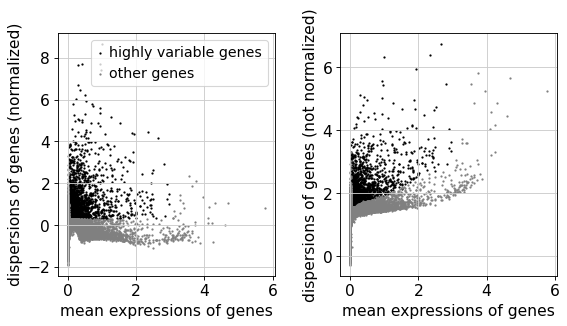

In [81]:
sc.pl.highly_variable_genes(adata)

In [82]:
print(np.sum(adata.var.highly_variable))

3951


In [83]:
adata = adata[:, adata.var.highly_variable].copy()

In [84]:
adata.write('./write/EMTAB7895_lognorm_hvg.h5ad')

# Preliminary processing

In [85]:
adata = sc.read('./write/EMTAB7895_lognorm_hvg.h5ad')

In [86]:
# normally regress out the top layers of unwanted effects
sc.pp.regress_out(adata, ['total_counts','n_genes_by_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'n_genes_by_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:03:57)


In [87]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:10)


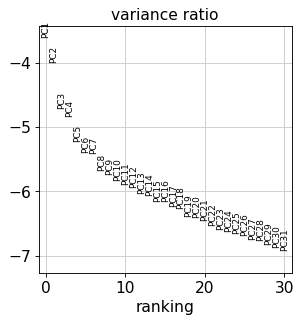

In [88]:
sc.pl.pca_variance_ratio(adata, log=True)

In [89]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)


In [90]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:59)


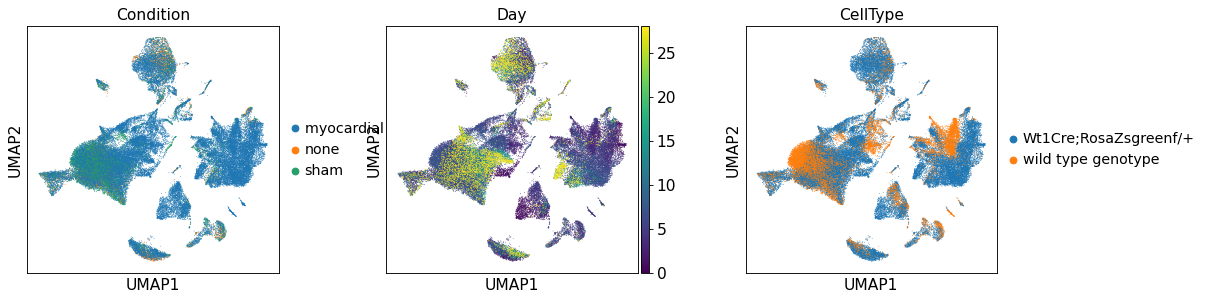

In [91]:
sc.pl.umap(adata, color= ['Condition', 'Day', 'CellType'], wspace=0.3)

In [92]:
adata.write('./write/EMTAB7895_processed.h5ad')

#  Further modify

In [93]:
adata = sc.read('./write/EMTAB7895_processed.h5ad')

In [94]:
adata.obs['Day'].value_counts()

7     17749
3     12335
5      7445
14     7419
0      7223
28     6250
1      5404
Name: Day, dtype: int64

In [95]:
adata.obs['Day'] = adata.obs['Day'].astype(int)

In [96]:
adata.obs['Age'].value_counts()

10    63825
Name: Age, dtype: int64

In [97]:
adata.obs['Age'] = adata.obs['Age'].astype(int)

In [98]:
adata.obs['Development_stage'].value_counts()

adult    63825
Name: Development_stage, dtype: int64

In [99]:
adata.obs['Genotype'].value_counts()

Wt1Cre;RosaZsgreenf/+    46946
wild type genotype       16879
Name: Genotype, dtype: int64

In [100]:
adata.obs['Genotype'] = ['WT' if 'wild type' in x else x for x in adata.obs['Genotype']]

In [101]:
adata.obs['Genotype'].value_counts()

Wt1Cre;RosaZsgreenf/+    46946
WT                       16879
Name: Genotype, dtype: int64

In [102]:
adata.obs['CellType'].value_counts()

Wt1Cre;RosaZsgreenf/+    46946
wild type genotype       16879
Name: CellType, dtype: int64

In [106]:
adata.obs['CellType'] = 'Interstitial cells'

In [107]:
adata.obs['CellType'].value_counts()

Interstitial cells    63825
Name: CellType, dtype: int64

In [105]:
adata.obs['StudyID'].value_counts()

EMTAB7895    63825
Name: StudyID, dtype: int64

In [108]:
adata.obs['ERR'].value_counts()

ERR3289178    7445
ERR3289192    7419
ERR3289181    7312
ERR3289167    7223
ERR3289176    6442
ERR3289193    6250
ERR3289173    5893
ERR3289170    5404
ERR3289190    4908
ERR3289187    3555
ERR3289184    1974
Name: ERR, dtype: int64

In [109]:
adata.obs['Index'] = adata.obs['ERR']

In [110]:
adata.obs['Index'].value_counts()

ERR3289178    7445
ERR3289192    7419
ERR3289181    7312
ERR3289167    7223
ERR3289176    6442
ERR3289193    6250
ERR3289173    5893
ERR3289170    5404
ERR3289190    4908
ERR3289187    3555
ERR3289184    1974
Name: Index, dtype: int64

In [111]:
adata.obs['Tissue'].value_counts()

cardiac ventricle    63825
Name: Tissue, dtype: int64

In [118]:
adata.obs['Tissue'] = 'ventricle'

In [119]:
adata.obs['Tissue'].value_counts()

ventricle    63825
Name: Tissue, dtype: int64

In [114]:
adata.obs['Condition'].value_counts()

myocardial infarction    46165
sham                     10437
none                      7223
Name: Condition, dtype: int64

In [115]:
Condition = {
    'myocardial infarction': 'MI',
    'sham': 'Sham',
    'none': 'Normal'
}

In [116]:
adata.obs['Condition'] = [Condition[x] if x in Condition.keys() else x for x in adata.obs['Condition']]

In [117]:
adata.obs['Condition'].value_counts()

MI        46165
Sham      10437
Normal     7223
Name: Condition, dtype: int64

In [120]:
adata.write('./write/EMTAB7895_processed.h5ad')

... storing 'Genotype' as categorical
... storing 'CellType' as categorical
... storing 'Condition' as categorical
... storing 'Tissue' as categorical


# get ZsGreen reads

In [40]:
adata = sc.read('./write/EMTAB7895_processed.h5ad')

In [35]:
adata.shape

(63825, 3951)

In [30]:
meta1.index

Index(['MF17004', 'MF17008', 'MF17010', 'MF17013', 'MF17014', 'MF17015',
       'MF17016', 'MF17017', 'MF17018', 'MF18001', 'MF18002'],
      dtype='object', name='Source Name')

In [31]:
FileDir_old = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895'
FileDir_new = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895/raw_data/'
CN = []
ZsGreen = []
for idx, ID in enumerate(meta1.index):
    adata_new = sc.read_10x_h5(FileDir_new+ID+'_out/outs/raw_feature_bc_matrix.h5')
    adata_old = sc.read_10x_h5(FileDir_old+'/processed_data/'+ID+'_out/outs/filtered_feature_bc_matrix.h5')
    adata_sub = adata_new[adata_old.obs_names].copy()
    CN.extend([x+'-'+str(idx) for x in adata_sub.obs_names])
    ZsGreen.extend(adata_sub[:,'ZsGreen'].X.toarray().flatten()) 
    del adata_new
    del adata_old
    del adata_sub

reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895/raw_data/MF17004_out/outs/raw_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895/processed_data/MF17004_out/outs/filtered_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7895/raw_data/MF17008_out/outs/raw_feature_bc_matrix.h5
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
 (0:00:00)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
reading /nfs01data1/Groups/Wangxiaon

In [46]:
DF = pd.DataFrame([CN, ZsGreen]).T
DF.columns = ['CN', 'ZsGreen']
DF.set_index('CN', inplace=True)
DF = DF.loc[adata.obs_names,:].copy()

In [47]:
DF.head()

,ZsGreen
AAACCTGAGTCTCAAC-1-0,0
AAACCTGGTTGTTTGG-1-0,0
AAACCTGTCTAACCGA-1-0,0
AAACGGGCATACGCTA-1-0,0
AAACGGGGTAAGGATT-1-0,0


In [55]:
np.sum(DF['ZsGreen']>0)

1634

In [49]:
DF.shape

(63825, 1)

In [50]:
adata.obs['ZsGreen'] = DF['ZsGreen']

In [53]:
adata.obs['ZsGreen'] =  adata.obs['ZsGreen'].astype(int)

In [54]:
adata.write('./write/EMTAB7895_processed.h5ad')